In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

2023-12-03 21:52:12.376417: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def create_model() -> tf.keras.models.Sequential:
    model: tf.keras.models.Sequential = Sequential()
    # Add three layers, each with a single ReLU neuron
    model.add(Dense(units=3, activation='relu', input_shape=(1,)))  # First layer 
    model.add(Dense(units=3, activation='relu'))                    # Second layer
    model.add(Dense(units=3, activation='relu'))                    # Third layer
    return model

In [3]:
def compile_model(model: tf.keras.models.Sequential) -> None:
    model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Dummy data for demonstration (replace with your actual data)
np.random.seed(0)
x_train = np.random.rand(100, 1)  # 100 data points
y_train = 2 * x_train + 1 + np.random.randn(100, 1) * 0.1  # Linear relation with some noise

x_val = np.random.rand(20, 1)  # 20 data points for validation
y_val = 2 * x_val + 1 + np.random.randn(20, 1) * 0.1

In [10]:
# Creating and compiling the model
my_model = create_model()
compile_model(my_model)

In [16]:
# Train the model for 20 epochs
history = my_model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_val, y_val))

Epoch 1/20
10/10 [==============================] - 0s 10ms/step - loss: 2.0007 - val_loss: 1.8925
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 1.9478 - val_loss: 1.8439
Epoch 3/20
10/10 [==============================] - 0s 5ms/step - loss: 1.8998 - val_loss: 1.7968
Epoch 4/20
10/10 [==============================] - 0s 5ms/step - loss: 1.8519 - val_loss: 1.7537
Epoch 5/20
10/10 [==============================] - 0s 4ms/step - loss: 1.8098 - val_loss: 1.7121
Epoch 6/20
10/10 [==============================] - 0s 4ms/step - loss: 1.7670 - val_loss: 1.6752
Epoch 7/20
10/10 [==============================] - 0s 4ms/step - loss: 1.7309 - val_loss: 1.6394
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 1.6945 - val_loss: 1.6076
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 1.6630 - val_loss: 1.5779
Epoch 10/20
10/10 [==============================] - 0s 4ms/step - loss: 1.6329 - val_loss: 1.5514
Epoch 11/20
10/10 

In [17]:
# Evaluate the model
loss = my_model.evaluate(x_val, y_val)
print(f'Validation Loss: {loss}')

1/1 [==============================] - 0s 30ms/step - loss: 1.3995
Validation Loss: 1.3994903564453125


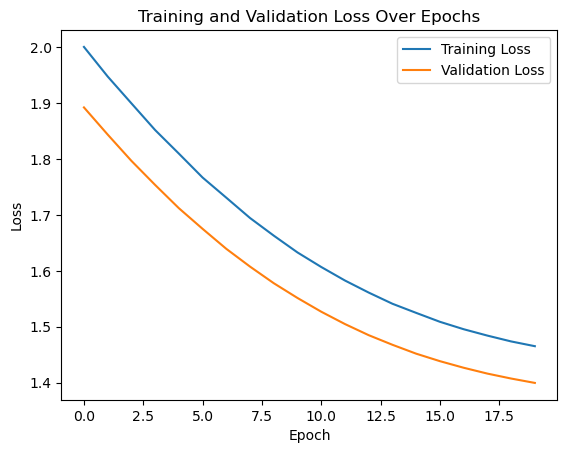

In [18]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()